# Análise de Sentimentos em Comentários nas Redes Sociais

Neste notebook, vamos realizar uma análise aprofundada dos comentários feitos nas redes sociais, explorando os diferentes sentimentos expressos pelos usuários de diversos países. Utilizaremos nossa pipeline especializada de análise de sentimentos para processar os dados e extrair insights valiosos sobre como as pessoas estão se manifestando.

Alguns pontos que iremos analisar:
- Distribuição de sentimentos (positivos/negativos) por país
- Padrões de engajamento nos comentários
- Principais temas e tópicos discutidos
- Correlação entre localização geográfica e sentimento

Esta análise nos ajudará a entender melhor o comportamento e as opiniões dos usuários em diferentes regiões.

In [1]:
import sys
import os
sys.path.append('../../src')

from pipes.social_pipeline import create_sentiment_analysis_pipeline
from social_analysis import load_comments_from_json

# Carrega os comentários do arquivo JSON
comments = load_comments_from_json("../../data/comments_dataset.json")

# Cria e executa o pipeline de análise de sentimentos
pipeline = create_sentiment_analysis_pipeline()
processed_comments = list(pipeline.process(comments))

# Imprime um resumo dos resultados
print("\n" + "="*60)
print("📊 ANÁLISE DE SENTIMENTOS DOS COMENTÁRIOS")
print("="*60)

# Contagem de comentários por sentimento
sentimentos = {}
for comment in processed_comments:
    sentiment = comment.get('sentiment', 'Neutro')
    sentimentos[sentiment] = sentimentos.get(sentiment, 0) + 1

print("\nDistribuição de comentários por sentimento:")
for sentiment, count in sorted(sentimentos.items(), key=lambda x: x[1], reverse=True):
    emoji = "😊" if sentiment == "positive" else "☹️"
    print(f"{emoji} {sentiment}: {count:,} comentários")

# Calcula percentuais
total = sum(sentimentos.values())
print("\nPercentuais:")
for sentiment, count in sorted(sentimentos.items(), key=lambda x: x[1], reverse=True):
    percent = (count/total) * 100
    print(f"- {sentiment}: {percent:.1f}%")

print("="*60)



📊 ANÁLISE DE SENTIMENTOS DOS COMENTÁRIOS

Distribuição de comentários por sentimento:
😊 positive: 10,451 comentários
☹️ negative: 4,549 comentários

Percentuais:
- positive: 69.7%
- negative: 30.3%


Grafico da operação gerada

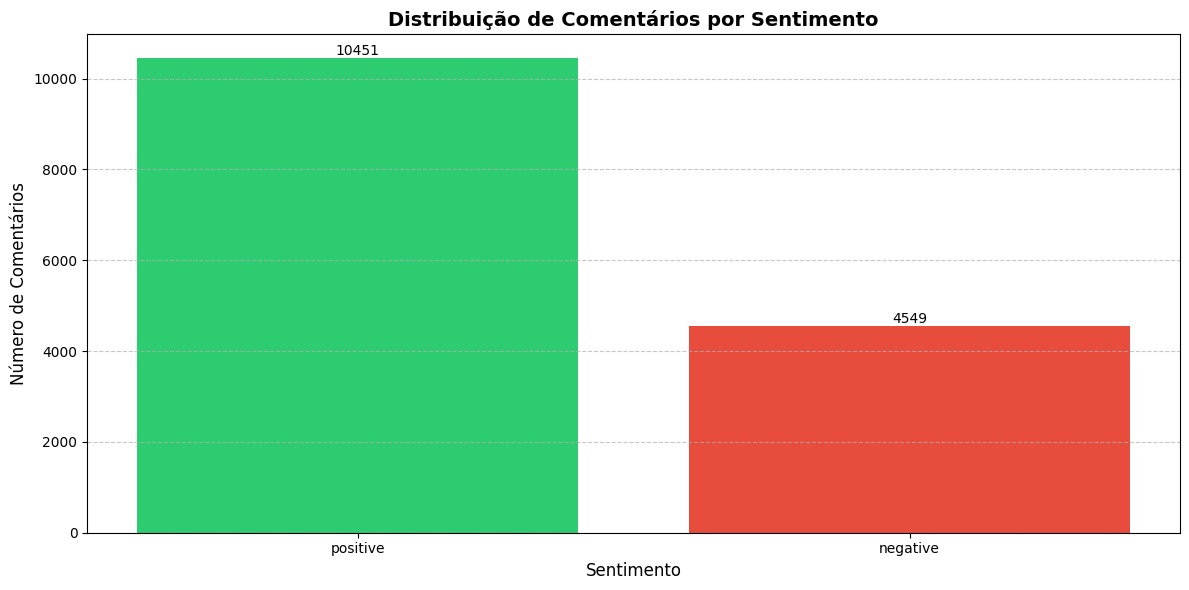

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Ordena os sentimentos por número de comentários
sorted_sentiments = dict(sorted(sentimentos.items(), key=lambda x: x[1], reverse=True))

# Define cores para sentimentos
cores = ['#2ecc71', '#e74c3c'] # Verde para positivo, vermelho para negativo

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(sorted_sentiments.keys(), sorted_sentiments.values(), color=cores)

# Personaliza o gráfico
plt.title('Distribuição de Comentários por Sentimento', fontsize=14, fontweight='bold')
plt.xlabel('Sentimento', fontsize=12)
plt.ylabel('Número de Comentários', fontsize=12)

# Adiciona rótulos nas barras
for i, v in enumerate(sorted_sentiments.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adiciona grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajusta o layout
plt.tight_layout()

# Mostra o gráfico
plt.show()


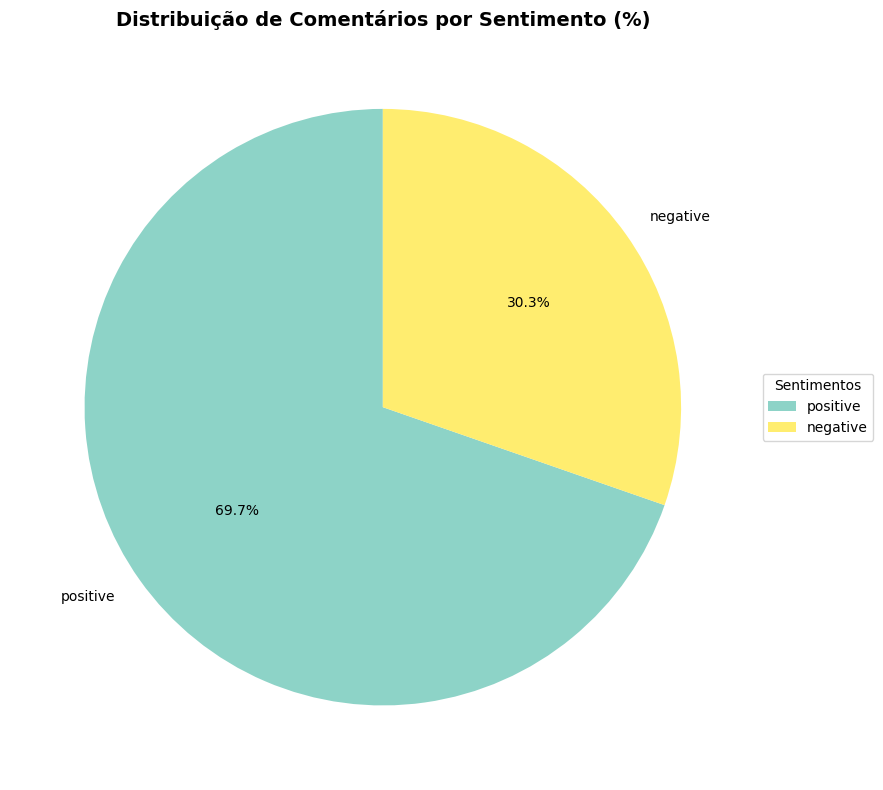

In [3]:
# Importa numpy
import numpy as np

# Cria o gráfico de pizza
plt.figure(figsize=(12, 8))
cores = plt.cm.Set3(np.linspace(0, 1, len(sentimentos)))
plt.pie(sentimentos.values(), labels=sentimentos.keys(), autopct='%1.1f%%', 
        colors=cores, startangle=90)

# Personaliza o gráfico
plt.title('Distribuição de Comentários por Sentimento (%)', fontsize=14, fontweight='bold')

# Adiciona legenda
plt.legend(sentimentos.keys(), title="Sentimentos", 
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Ajusta o layout para não cortar a legenda
plt.tight_layout()

# Mostra o gráfico
plt.show()
